# Week 10 — Resource Tagging: EDA Notebook

This notebook performs Task Sets 1–3 and includes examples for Task Set 4 visualizations.
Load your `original.csv` into the same folder as this notebook (or upload in Jupyter), then run the cells.

In [ ]:
import sys
!{sys.executable} -m pip install pandas plotly streamlit

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached plotly-6.4.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached streamlit-1.51.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached numpy-2.3.4-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached narwhals-2.11.0-py3-none-any.whl.metadata (11 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyarrow-21.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

# Task Set 1 – Data Exploration

# Load CSV file
df = pd.read_csv("cloudmart_multi_account.csv", sep=",", engine="python")

# Clean column names: remove quotes and extra spaces
df.columns = df.columns.str.strip().str.replace('"', '')

# Clean all string columns: remove quotes and extra spaces
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.replace('"', '')

# Show first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Check missing values for all columns
print("\nMissing values for all columns:")
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()} missing values")

# Count missing values for all columns
missing_counts = df.isnull().sum()

# Sort descending to see columns with most missing values at the top
missing_sorted = missing_counts.sort_values(ascending=False)

# Display the result
print("Columns sorted by missing values (most to least):")
print(missing_sorted)

# Count Total Resources
total_resources = len(df)
print("Total resources:", total_resources)

# Count tagged vs untagged
tag_counts = df['Tagged'].value_counts()
print("\nTagged vs untagged resources:")
print(tag_counts)

# Count total resources
total_resources = len(df)

# Count tagged vs untagged
tag_counts = df['Tagged'].value_counts()

# Calculate percentage of untagged resources
untagged_percentage = (tag_counts.get('No', 0) / total_resources) * 100

print(f"Percentage of untagged resources: {untagged_percentage:.2f}%")


First 5 rows of the dataset:
   AccountID ResourceID     Service     Region Department      Project  \
0       1001      i-001         EC2  us-east-1  Marketing  CampaignApp   
1       1001      i-002         EC2  us-east-1  Marketing  CampaignApp   
2       1001     s3-001          S3  us-east-1  Marketing       AdsAPI   
3       1001     s3-002          S3  us-east-1  Marketing       AdsAPI   
4       1001    api-001  APIGateway  us-east-2  Marketing       AdsAPI   

  Environment                  Owner CostCenter  CreatedBy  MonthlyCostUSD  \
0        Prod  j.smith@cloudmart.com      CC101  Terraform           120.0   
1         Dev                    NaN      CC101  Terraform            80.0   
2        Prod  j.smith@cloudmart.com      CC101    Jenkins            60.0   
3         Dev                    NaN      CC101     Manual            25.0   
4        Prod  j.smith@cloudmart.com      CC101    Jenkins            70.0   

  Tagged  
0    Yes  
1     No  
2    Yes  
3     No  
4 

In [40]:
# Task Set 2 – Cost Visibility

# Make sure 'MonthlyCostUSD' is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Group by 'Tagged' and sum the cost
total_cost_by_tag = df.groupby('Tagged')['MonthlyCostUSD'].sum()

print("Total cost by Tagged vs Untagged resources:")
print(total_cost_by_tag)

# Ensure 'MonthlyCostUSD' is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Group by 'Tagged' and sum the cost
total_cost_by_tag = df.groupby('Tagged')['MonthlyCostUSD'].sum()

# Total cost of all resources
total_cost = total_cost_by_tag.sum()

# Percentage of total cost that is untagged
untagged_cost_percentage = (total_cost_by_tag.get('No', 0) / total_cost) * 100

print(f"Percentage of total cost that is untagged: {untagged_cost_percentage:.2f}%")

# Ensure MonthlyCostUSD is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Filter only untagged resources
untagged_df = df[df['Tagged'] == 'No']

# Group by Department and sum the cost
untagged_cost_by_dept = untagged_df.groupby('Department')['MonthlyCostUSD'].sum()

# Sort descending to find the department with the most untagged cost
untagged_cost_by_dept_sorted = untagged_cost_by_dept.sort_values(ascending=False)

print("Total untagged cost by department:")
print(untagged_cost_by_dept_sorted)

# Department with the highest untagged cost
top_dept = untagged_cost_by_dept_sorted.idxmax()
top_cost = untagged_cost_by_dept_sorted.max()

print(f"\nDepartment with the most untagged cost: {top_dept} (${top_cost})")

# Ensure MonthlyCostUSD is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Group by Department and Tagged and sum the total cost
dept_tagged_summary = df.groupby(['Department', 'Tagged'])['MonthlyCostUSD'].sum().reset_index()

print("Total cost by Department and Tagging status:")
print(dept_tagged_summary)

# Filter only untagged resources
untagged_by_dept = dept_tagged_summary[dept_tagged_summary['Tagged'] == 'No']

# Sort descending to find department with the highest untagged cost
untagged_by_dept_sorted = untagged_by_dept.sort_values(by='MonthlyCostUSD', ascending=False)

print("\nDepartments sorted by untagged cost (highest first):")
print(untagged_by_dept_sorted)

# Department with the most untagged cost
top_dept = untagged_by_dept_sorted.iloc[0]['Department']
top_cost = untagged_by_dept_sorted.iloc[0]['MonthlyCostUSD']

print(f"\nDepartment with the most untagged cost: {top_dept} (${top_cost})")

# Ensure MonthlyCostUSD is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Group by Environment and Tagged, sum the cost
env_tagged_summary = df.groupby(['Environment', 'Tagged'])['MonthlyCostUSD'].sum().reset_index()

print("Cost by Environment and Tagging status:")
print(env_tagged_summary)

Total cost by Tagged vs Untagged resources:
Tagged
No     2250.0
Yes    4680.0
Name: MonthlyCostUSD, dtype: float64
Percentage of total cost that is untagged: 32.47%
Total untagged cost by department:
Department
Sales        480.0
Analytics    420.0
Finance      400.0
HR           340.0
DevOps       330.0
Marketing    280.0
Name: MonthlyCostUSD, dtype: float64

Department with the most untagged cost: Sales ($480.0)
Total cost by Department and Tagging status:
   Department Tagged  MonthlyCostUSD
0   Analytics     No           420.0
1   Analytics    Yes           800.0
2      DevOps     No           330.0
3      DevOps    Yes           550.0
4     Finance     No           400.0
5     Finance    Yes           620.0
6          HR     No           340.0
7          HR    Yes           670.0
8   Marketing     No           280.0
9   Marketing    Yes           600.0
10      Sales     No           480.0
11      Sales    Yes          1440.0

Departments sorted by untagged cost (highest first):
 

In [44]:
# Task Set 3 – Tagging Compliance
# List of tag fields
tag_fields = ['Department', 'Project', 'Owner']

# Create Tag Completeness Score
df['TagCompletenessScore'] = df[tag_fields].notnull().sum(axis=1)

print("First 5 rows with Tag Completeness Score:")
print(df[['AccountID', 'ResourceID', 'Department', 'Project', 'Owner', 'TagCompletenessScore']].head())

# Sort the DataFrame by TagCompletenessScore ascending
lowest_score_resources = df.sort_values(by='TagCompletenessScore', ascending=True)

# Select top 5 resources with lowest completeness scores
top5_lowest = lowest_score_resources.head(5)

# Display relevant columns
print("Top 5 resources with lowest tag completeness scores:")
print(top5_lowest[['AccountID', 'ResourceID', 'Department', 'Project', 'Owner', 'TagCompletenessScore']])

# List of tag fields
tag_fields = ['Department', 'Project', 'Owner']

# Count missing values per tag field
missing_counts = df[tag_fields].isnull().sum()

# Sort descending to see most frequently missing first
missing_counts_sorted = missing_counts.sort_values(ascending=False)

print("Number of missing values per tag field:")
print(missing_counts_sorted)

# Ensure MonthlyCostUSD is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Filter only untagged resources
untagged_resources = df[df['Tagged'] == 'No']

# Select relevant columns
untagged_resources_list = untagged_resources[['AccountID', 'ResourceID', 'Department', 'Project', 'Owner', 'MonthlyCostUSD']]

print("List of all untagged resources and their costs:")
print(untagged_resources_list)

# Ensure MonthlyCostUSD is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Filter only untagged resources
untagged_resources = df[df['Tagged'] == 'No']

# Select relevant columns to export
untagged_resources_list = untagged_resources[['AccountID', 'ResourceID', 'Department', 'Project', 'Owner', 'MonthlyCostUSD']]

# Export to CSV
untagged_resources_list.to_csv("untagged_resources.csv", index=False)

print("Untagged resources have been exported to 'untagged_resources.csv'")

First 5 rows with Tag Completeness Score:
   AccountID ResourceID Department      Project                  Owner  \
0       1001      i-001  Marketing  CampaignApp  j.smith@cloudmart.com   
1       1001      i-002  Marketing  CampaignApp                    NaN   
2       1001     s3-001  Marketing       AdsAPI  j.smith@cloudmart.com   
3       1001     s3-002  Marketing       AdsAPI                    NaN   
4       1001    api-001  Marketing       AdsAPI  j.smith@cloudmart.com   

   TagCompletenessScore  
0                     3  
1                     2  
2                     3  
3                     2  
4                     3  
Top 5 resources with lowest tag completeness scores:
    AccountID ResourceID Department  Project   Owner  TagCompletenessScore
7        1001    ebs-002        NaN      NaN  Manual                     1
13       1002    ec2-004        NaN      NaN  Manual                     1
49       1002    ec2-004        NaN      NaN  Manual                     1
43  

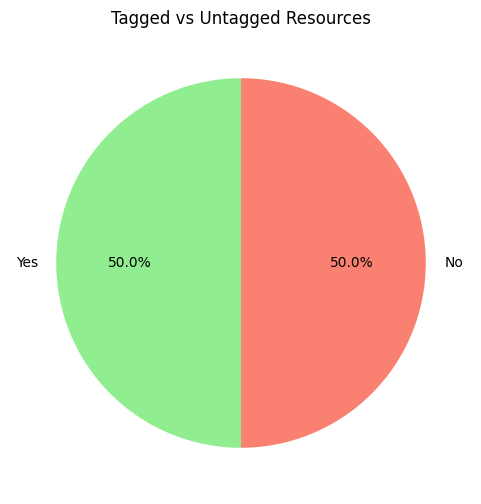

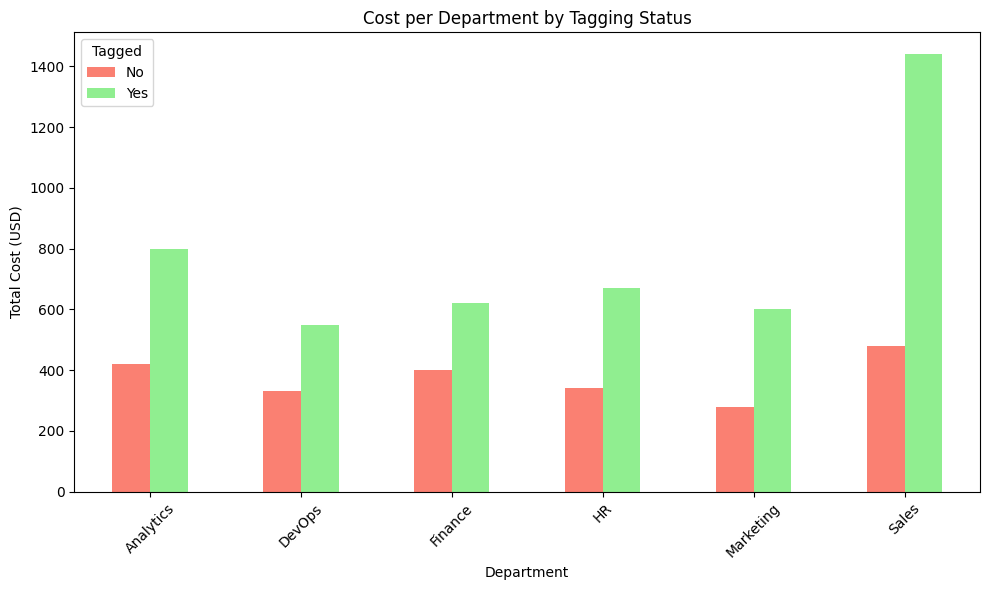

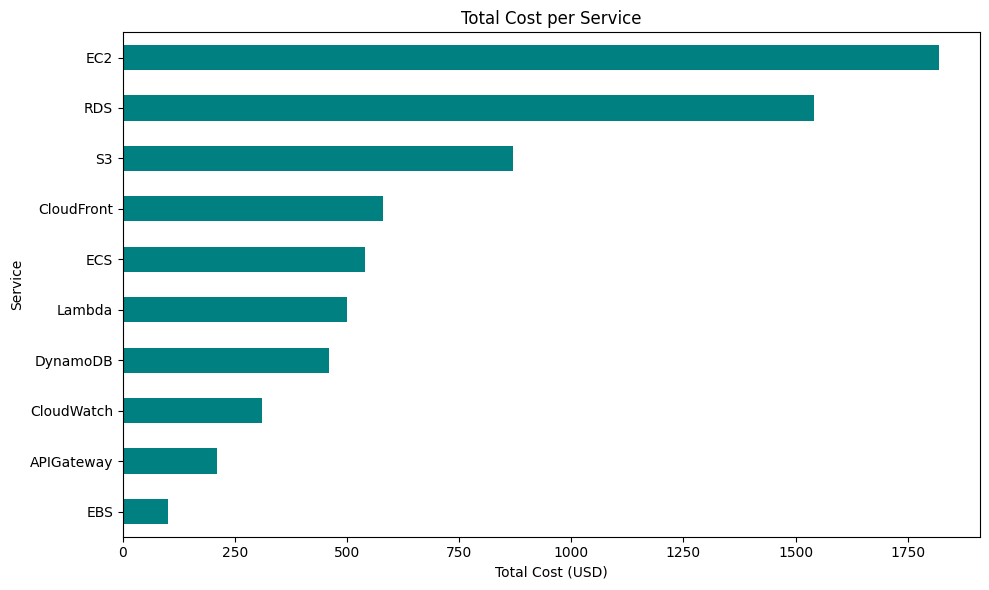

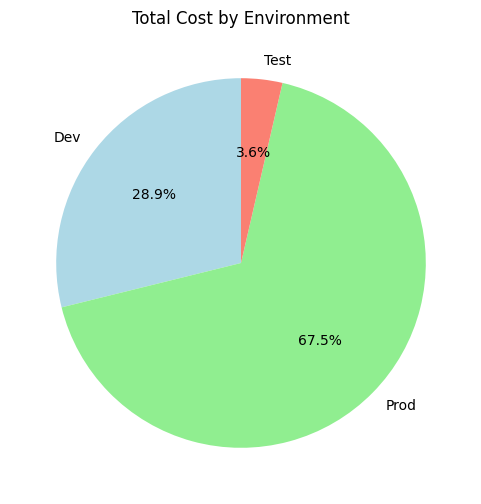

In [ ]:
# Task Set 4 – Visualization Dashboard
import matplotlib.pyplot as plt

# Count tagged vs untagged resources
tag_counts = df['Tagged'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Tagged vs Untagged Resources')
plt.show()

# Ensure MonthlyCostUSD is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Group by Department and Tagged, summing the cost
dept_tagged_cost = df.groupby(['Department', 'Tagged'])['MonthlyCostUSD'].sum().unstack()

# Plot a bar chart
dept_tagged_cost.plot(kind='bar', figsize=(10,6), color=['salmon', 'lightgreen'])
plt.title('Cost per Department by Tagging Status')
plt.ylabel('Total Cost (USD)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.legend(title='Tagged')
plt.tight_layout()
plt.show()

# Ensure MonthlyCostUSD is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Group by Service and sum total cost
service_cost = df.groupby('Service')['MonthlyCostUSD'].sum().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
service_cost.plot(kind='barh', color='teal')
plt.title('Total Cost per Service')
plt.xlabel('Total Cost (USD)')
plt.ylabel('Service')
plt.tight_layout()
plt.show()

# Chose Pie Cart
import matplotlib.pyplot as plt

# Ensure MonthlyCostUSD is numeric
df['MonthlyCostUSD'] = pd.to_numeric(df['MonthlyCostUSD'], errors='coerce')

# Group by Environment and sum cost
env_cost = df.groupby('Environment')['MonthlyCostUSD'].sum()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(env_cost, labels=env_cost.index, autopct='%1.1f%%', startangle=90, colors=['lightblue','lightgreen','salmon'])
plt.title('Total Cost by Environment')
plt.show()
